In [ ]:
# Report/ Analysis
#The tumor volume changes was compared over time throughout the full 45 days for treatment with different drugs.
#it was discovered that only for the drugs 'Capomulin', 'Ramicane' there was a decrease in a tumor volume with percentage change of (-22.32%) for Ramicane and (-19.47%) for Capomulin respectively
#The number of metastatic (cancer spreading) sites changes were observed over time for each of the treatment.It was discovered that maximum change was for the drug Ketapril followed by Placebo.
#Throughout the treatment, it was observed that survived mice for each drug, Capomulin(21) has the heighest throughout the 45 days of the treatment followed by drug Ramicane(20) and looking at the graph, it shows there was a decrease in a tumor volume that shows consistency with the trend of survived mice.

In [83]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")


# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_data_to_load, clinical_trial_data_to_load, on="Mouse ID", how="left")

# Display the data table for preview

combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [84]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_groupby = combined_df.groupby(["Drug", "Timepoint"])
ave_turmor = drug_timepoint_groupby["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
ave_turmor = pd.DataFrame(ave_turmor).reset_index()
# Preview DataFrame
ave_turmor.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [85]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_turmor_volume = drug_timepoint_groupby["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
standard_error_turmor_volume = pd.DataFrame(standard_error_turmor_volume).reset_index()
# Preview DataFrame
standard_error_turmor_volume.head(20)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [86]:
# Minor Data Munging to Re-Format the Data Frames

Mungled_Data = ave_turmor.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)') 
# Preview that Reformatting worked
Mungled_Data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


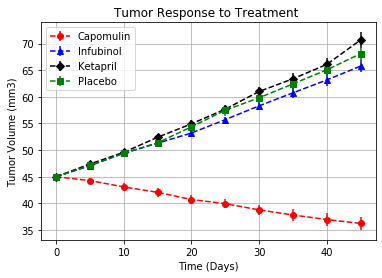

In [87]:
# Generate the Plot (with Error Bars)
Capomulin_error = standard_error_turmor_volume.loc[standard_error_turmor_volume["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = standard_error_turmor_volume.loc[standard_error_turmor_volume["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = standard_error_turmor_volume.loc[standard_error_turmor_volume["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = standard_error_turmor_volume.loc[standard_error_turmor_volume["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time, Mungled_Data["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(Time, Mungled_Data["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(Time, Mungled_Data["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.errorbar(Time, Mungled_Data["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [88]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_data = combined_df.groupby(["Drug", "Timepoint"])
met_mean = grouped_data["Metastatic Sites"].mean()
# Convert to DataFrame
met_mean = pd.DataFrame(met_mean).reset_index()

# Preview DataFrame
met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [89]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met_Site = grouped_data["Metastatic Sites"].sem()
# Convert to DataFrame
standard_error_met_Site = pd.DataFrame(standard_error_met_Site).reset_index()
# Preview DataFrame
standard_error_met_Site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [90]:
# Minor Data Munging to Re-Format the Data Frames
mungle_metasite = met_mean.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')
mungle_metasite.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


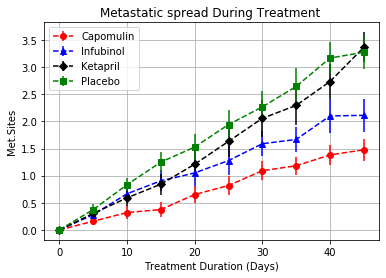

In [91]:
# Generate the Plot (with Error Bars)
Capomulin_error = standard_error_met_Site.loc[standard_error_met_Site["Drug"] == "Capomulin", "Metastatic Sites"]
Infubinol_error = standard_error_met_Site.loc[standard_error_met_Site["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_error = standard_error_met_Site.loc[standard_error_met_Site["Drug"] == "Ketapril", "Metastatic Sites"]
Placebo_error = standard_error_met_Site.loc[standard_error_met_Site["Drug"] == "Placebo", "Metastatic Sites"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.errorbar(Time, mungle_metasite["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(Time, mungle_metasite["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(Time, mungle_metasite["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.errorbar(Time, mungle_metasite["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Metastatic spread During Treatment ")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")
plt.grid()
# Show the Figure
plt.show()

In [92]:
# Save the Figure
#plt.savefig("Images/met_mean.png")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [93]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Group_drug_timepoint = combined_df.groupby(["Drug", "Timepoint"])
Count_Mice_Data = Group_drug_timepoint["Mouse ID"].count()
# Convert to DataFrame
Count_Mice_Data = pd.DataFrame(Count_Mice_Data).reset_index()
# Preview DataFrame
Count_Mice_Data.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [94]:
#Minor Data Munging to Re-Format the Data Frame
Mungled_mice = Count_Mice_Data.pivot(index = 'Timepoint', columns ='Drug', values = 'Mouse ID')
#Mungled_mice.head()

In [95]:
# Preview the Data Frame
Mungled_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


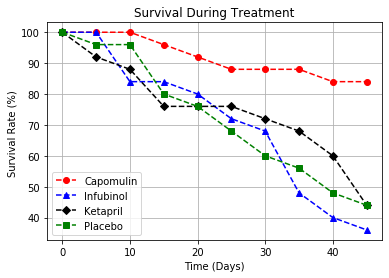

In [96]:
# Generate the Plot (Accounting for percentages)
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.plot(Time, (Mungled_mice["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(Time, (Mungled_mice["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(Time, (Mungled_mice["Ketapril"]/25)*100 , label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.plot(Time, (Mungled_mice["Placebo"]/25)*100 , label= "Placebo", marker= "s", color="green", linestyle='--')
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [97]:
# Calculate the percent changes for each drug
Intial_tumor_volume = 45
Percent_Change = ((Mungled_Data.loc[45, :] - Intial_tumor_volume)/Intial_tumor_volume)*100

# Display the data to confirm
Percent_Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [98]:
# Store all Relevant Percent Changes into a Tuple
Percent_Change_tuple_list = [('Capomulin', -19.475303 ),
                       ('Ceftamin', 42.516492 ),
                       ('Infubinol', 46.123472 ),
                       ('Ketapril', 57.028795 ),
                       ('Naftisol', 53.923347 ),
                       ('Placebo', 51.297960 ),
                       ('Propriva', 47.241175 ),
                       ('Ramicane', -22.320900 ),
                       ('Stelasyn', 52.085134 ),
                       ('Zoniferol', 46.579751 )]

#df = pd.DataFrame(Percent_Change_tuple_list)

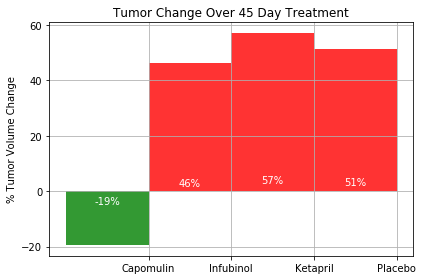

In [99]:
# Splice the data between passing and failing drugs
passing_drugs_list = []
failing_drugs_list = []
index_passing_drugs_list = []
index_failing_drugs_list = []
for d, green in Percent_Change_tuple_list:
    if green > 0:
        passing_drugs = green
        passing_drugs_list.append(green)
        index_passing_drugs_list.append(d)
    else :
        failing_drugs = green
        failing_drugs_list.append(green)
        index_failing_drugs_list.append(d)
passing_drugs = list(zip(index_passing_drugs_list, passing_drugs_list))
failing_drugs_list = list(zip(index_failing_drugs_list, failing_drugs_list))
#Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
y_value1 = [Percent_Change["Infubinol"], Percent_Change["Ketapril"], Percent_Change["Placebo"]]
x_axis1 = [0]
x_axis2 = [1, 2, 3]


bars1 = ax.bar(x_axis1, Percent_Change["Capomulin"], color='g', alpha=0.8, align="edge", width = -1)
bars2 = ax.bar(x_axis2, y_value1 , color='r', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.grid()

# Use functions to label the percentages of changes
def percentage_change(function):
    for func in function:
        height = func.get_height()
        ax.text(func.get_x() + func.get_width()/2, .1*height, "%d" %int(height)+ "%",
        ha='center', va='top', color="white")

# Call functions to implement the function calls
percentage_change(bars1)
percentage_change(bars2)
fig.tight_layout()
fig.show()
# Save the Figure


# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)